In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [112]:
dfs = []
for i in range(1, 6):
    file_name = f"real_data/pid/traj_pid_{i}.csv"
    df = pd.read_csv(file_name)
    df = df[:10000]
    df.z -= 0.2
    df["experiment_no"] = i
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

In [113]:
dfs2 = []
for i in range(1, 4):
    file_name = f"real_data/rvolmea/traj_rvolmea_{i}.csv"
    df2 = pd.read_csv(file_name)
    df2 = df2[:10000]
    # df2.z += 0.75
    df2["experiment_no"] = i
    dfs2.append(df2)
df2 = pd.concat(dfs2, ignore_index=True)

In [114]:
dfs3 = []
for i in range(2, 6):
    file_name = f"real_data/lqr/traj_lqr_{i}.csv"
    df3 = pd.read_csv(file_name)
    df3 = df3[:10000]
    df3.z -= 0.2
    df3["experiment_no"] = i
    dfs3.append(df3)
df3 = pd.concat(dfs3, ignore_index=True)

In [115]:
df.head()

,x,y,z,gx,gy,gz,motor0,motor1,motor2,motor3,target_yaw,yaw,experiment_no
0,-0.070921,0.081516,0.365505,0.000000,0.000000,0.5,0,0,0,0,1.10715,1.69122,1
1,-0.070921,0.081516,0.365505,-0.000800,0.002399,0.5,0,0,0,0,1.10715,1.69146,1
2,-0.070921,0.081516,0.365505,-0.001599,0.004798,0.5,0,0,0,0,1.10714,1.69146,1
3,-0.071432,0.081388,0.364534,-0.002399,0.007197,0.5,0,0,0,0,1.10714,1.69168,1
4,-0.071432,0.081388,0.364534,-0.003199,0.009596,0.5,0,0,0,0,1.10713,1.69176,1


In [116]:
df["se"] = (df.x - df.gx)**2 + (df.y - df.gy)**2 + (df.z - df.gz)**2

In [117]:
df2["se"] = (df2.x - df2.gx)**2 + (df2.y - df2.gy)**2 + (df2.z - df2.gz)**2

In [118]:
df3["se"] = (df3.x - df3.gx)**2 + (df3.y - df3.gy)**2 + (df3.z - df3.gz)**2

In [119]:
errors = df.groupby("experiment_no").agg(
    mean_se=("se", "mean"),
    std_se=("se", "std"),
    min_se=("se", "min"),
    max_se=("se", "max"),
    var_se=("se", "var")
)


In [120]:
errors.head(10)

,mean_se,std_se,min_se,max_se,var_se
experiment_no,,,,,
1,0.059601,0.037716,0.008766,0.187703,0.001422
2,0.060535,0.041910,0.003221,0.211565,0.001756
3,0.019260,0.013355,0.000305,0.063253,0.000178
4,0.028993,0.019947,0.000454,0.098364,0.000398
5,0.029760,0.015013,0.005665,0.077472,0.000225


In [121]:
mean_mse = errors.mean_se.mean()
print(f"Mean MSE: {mean_mse:.4f}")
max_mse = errors.mean_se.max()
min_mse = errors.mean_se.min()
std_mse = errors.mean_se.std(ddof=0)
var_mse = errors.mean_se.var()
print(f"Max MSE: {max_mse:.4f}")
print(f"Min MSE: {min_mse:.4f}")
print(f"Std MSE: {std_mse:.4f}")
print(f"Var MSE: {var_mse:.4f}")

Mean MSE: 0.0396
Max MSE: 0.0605
Min MSE: 0.0193
Std MSE: 0.0171
Var MSE: 0.0004


In [122]:
errors2 = df2.groupby("experiment_no").agg(
    mean_se=("se", "mean"),
    std_se=("se", "std"),
    min_se=("se", "min"),
    max_se=("se", "max"),
    var_se=("se", "var")
)
errors2.head(10)
mean_mse2 = errors2.mean_se.mean()
print(f"Mean MSE: {mean_mse2:.4f}")
max_mse2 = errors2.mean_se.max()
min_mse2 = errors2.mean_se.min()
std_mse2 = errors2.mean_se.std(ddof=0)
var_mse2 = errors2.mean_se.var()
print(f"Max MSE: {max_mse2:.4f}")
print(f"Min MSE: {min_mse2:.4f}")
print(f"Std MSE: {std_mse2:.4f}")
print(f"Var MSE: {var_mse2:.4f}")

Mean MSE: 0.0098
Max MSE: 0.0113
Min MSE: 0.0090
Std MSE: 0.0010
Var MSE: 0.0000


In [123]:
errors3 = df3.groupby("experiment_no").agg(
    mean_se=("se", "mean"),
    std_se=("se", "std"),
    min_se=("se", "min"),
    max_se=("se", "max"),
    var_se=("se", "var")
)
errors3.head(10)
mean_mse3 = errors3.mean_se.mean()
print(f"Mean MSE: {mean_mse3:.4f}")
max_mse3 = errors3.mean_se.max()
min_mse3 = errors3.mean_se.min()
std_mse3 = errors3.mean_se.std(ddof=0)
var_mse3 = errors3.mean_se.var()
print(f"Max MSE: {max_mse3:.4f}")
print(f"Min MSE: {min_mse3:.4f}")
print(f"Std MSE: {std_mse3:.4f}")
print(f"Var MSE: {var_mse3:.4f}")   

Mean MSE: 0.0223
Max MSE: 0.0229
Min MSE: 0.0211
Std MSE: 0.0007
Var MSE: 0.0000


In [124]:
df["control_sum"] = df.motor0 + df.motor1 + df.motor2 + df.motor3

In [125]:
motors = df.groupby("experiment_no").agg(
    mean_control_sum=("control_sum", "mean"),
)
motors.head(10)

,mean_control_sum
experiment_no,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [126]:
min_control_sum = motors.mean_control_sum.min()
max_control_sum = motors.mean_control_sum.max()
std_control_sum = motors.mean_control_sum.std()
print(f"Min Control Sum: {min_control_sum:.4f}")
print(f"Max Control Sum: {max_control_sum:.4f}")
print(f"Std Control Sum: {std_control_sum:.4f}")

Min Control Sum: 0.0000
Max Control Sum: 0.0000
Std Control Sum: 0.0000


In [127]:
df2["control_sum"] = df2.motor0 + df2.motor1 + df2.motor2 + df2.motor3
motors2 = df2.groupby("experiment_no").agg(
    mean_control_sum=("control_sum", "mean"),
)
motors2.head(10)
min_control_sum2 = motors2.mean_control_sum.min()
max_control_sum2 = motors2.mean_control_sum.max()
std_control_sum2 = motors2.mean_control_sum.std()
print(f"Min Control Sum: {min_control_sum2:.4f}")
print(f"Max Control Sum: {max_control_sum2:.4f}")
print(f"Std Control Sum: {std_control_sum2:.4f}")

Min Control Sum: 0.0000
Max Control Sum: 0.0000
Std Control Sum: 0.0000


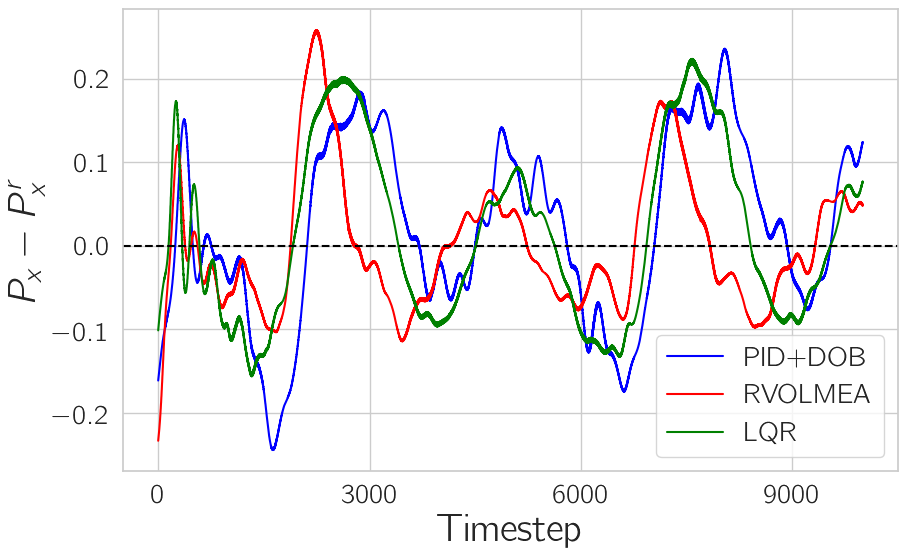

In [128]:
# Plot Px - Gx (for lowest mse lap)
from matplotlib import rc
from matplotlib.font_manager import FontProperties

# Enable LaTeX font rendering in Matplotlib and configure for 11pt Computer Modern font
rc('text', usetex=True)
rc('font', family='serif')
rc('text.latex', preamble=r'\usepackage{cmbright} \fontsize{28pt}{28pt}\selectfont')

# Define font properties for Computer Modern, 11pt
font_properties = FontProperties(family='serif', style='normal', weight='normal', size=28)

lowest_mse = errors.loc[errors.mean_se.idxmin()].name
lowest_mse2 = errors2.loc[errors2.mean_se.idxmin()].name
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=[i for i in range(0, len(df[df.experiment_no == lowest_mse]))],
             y=df[df.experiment_no == lowest_mse].x - df[df.experiment_no == lowest_mse].gx,
             label="PID+DOB",
             color="blue")
sns.lineplot(x=[i for i in range(0, len(df2[df2.experiment_no == lowest_mse2]))],
             y=df2[df2.experiment_no == lowest_mse2].x - df2[df2.experiment_no == lowest_mse2].gx,
             label="RVOLMEA",
             color="red")
sns.lineplot(x=[i for i in range(0, len(df3[df3.experiment_no == errors3.mean_se.idxmin()]))],
             y=df3[df3.experiment_no == errors3.mean_se.idxmin()].x - df3[df3.experiment_no == errors3.mean_se.idxmin()].gx,
             label="LQR",
             color="green")

plt.xlabel("Timestep", fontproperties=font_properties)
plt.ylabel("$P_x - P_x^r$", fontproperties=font_properties)

# Set x and y ticks font size and reduce x ticks
plt.xticks(ticks=range(0, len(df[df.experiment_no == lowest_mse]), 3000), fontsize=20)
plt.yticks(fontsize=20)

# Draw line at 0 to make clear where error middle is
plt.axhline(0, color="black", linestyle="--")

# Update legend font size
leg = plt.legend(prop={'size': 20})

# Save as pdf
plt.savefig("pid_dob_rvolmea_lemniscate_x_real.pdf", bbox_inches="tight")

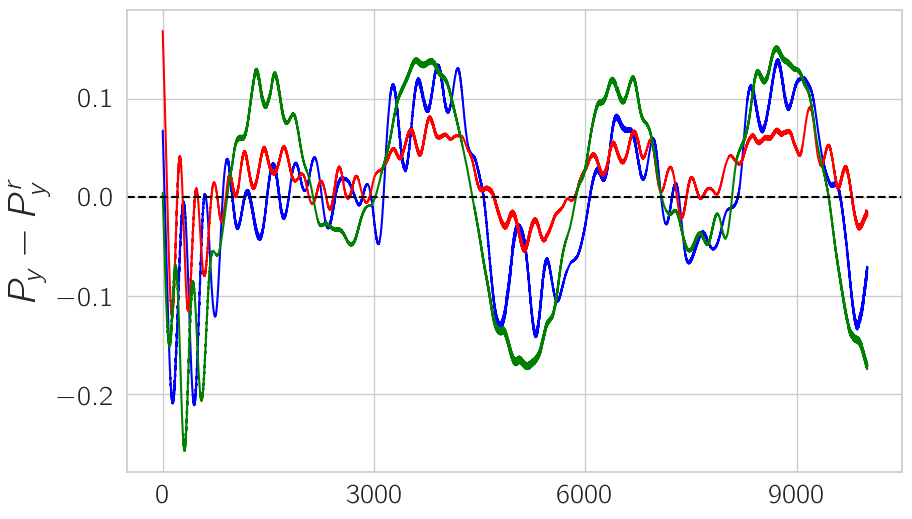

In [129]:
# Plot Py - Gy (for lowest mse lap)
plt.figure(figsize=(10, 6))
sns.lineplot(x=[i for i in range(0, len(df[df.experiment_no == lowest_mse]))],
             y=df[df.experiment_no == lowest_mse].y - df[df.experiment_no == lowest_mse].gy,
             color="blue")
sns.lineplot(x=[i for i in range(0, len(df2[df2.experiment_no == lowest_mse2]))],
                y=df2[df2.experiment_no == lowest_mse2].y - df2[df2.experiment_no == lowest_mse2].gy,
                color="red")
sns.lineplot(x=[i for i in range(0, len(df3[df3.experiment_no == errors3.mean_se.idxmin()]))],
             y=df3[df3.experiment_no == errors3.mean_se.idxmin()].y - df3[df3.experiment_no == errors3.mean_se.idxmin()].gy,
             color="green")
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("$P_y -P_y^r$",  fontproperties=font_properties)

# Set x and y ticks font size and reduce x ticks
plt.xticks(ticks=range(0, len(df[df.experiment_no == lowest_mse]), 3000), fontsize=20)
plt.yticks(fontsize=20)



#save as pdf
plt.savefig("pid_dob_rvolmea_lemniscate_y_real.pdf", bbox_inches="tight")

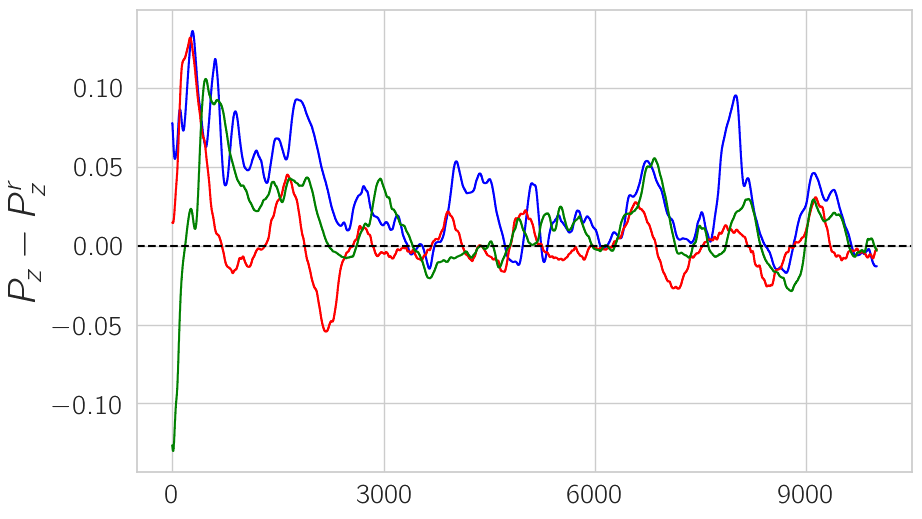

In [130]:
#plot gz
plt.figure(figsize=(10, 6))
sns.lineplot(x=[i for i in range(0, len(df[df.experiment_no == lowest_mse]))],
             y=df[df.experiment_no == lowest_mse].z - df[df.experiment_no == lowest_mse].gz,
             color="blue")
sns.lineplot(x=[i for i in range(0, len(df2[df2.experiment_no == lowest_mse2]))],
                y=df2[df2.experiment_no == lowest_mse2].z - df2[df2.experiment_no == lowest_mse2].gz,
                color="red")
sns.lineplot(x=[i for i in range(0, len(df3[df3.experiment_no == errors3.mean_se.idxmin()]))],
             y=df3[df3.experiment_no == errors3.mean_se.idxmin()].z - df3[df3.experiment_no == errors3.mean_se.idxmin()].gz,
             color="green")
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("$P_z - P_z^r$",  fontproperties=font_properties)

# Set x and y ticks font size and reduce x ticks
plt.xticks(ticks=range(0, len(df[df.experiment_no == lowest_mse]), 3000), fontsize=20)
plt.yticks(fontsize=20)


#save as pdf
plt.savefig("pid_dob_rvolmea_lemniscate_z_real.pdf", bbox_inches="tight")

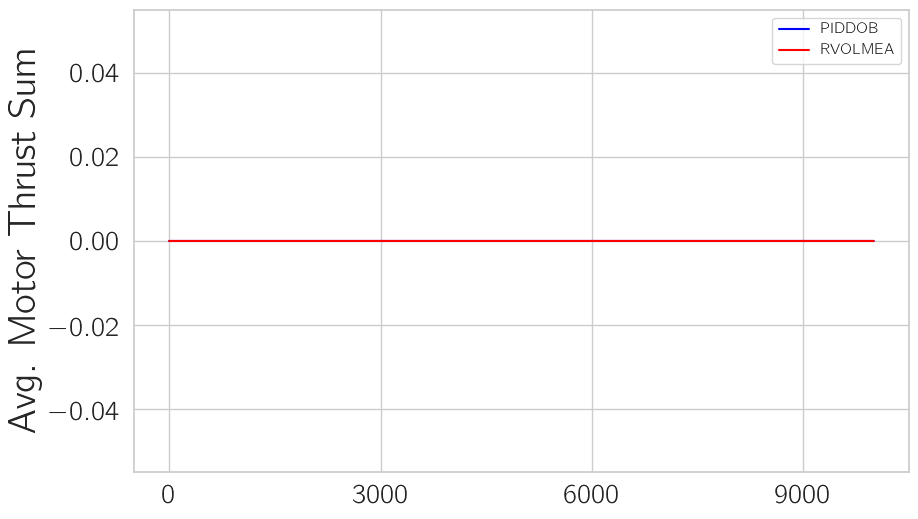

In [131]:
# Plot all 4 motors for best lap
plt.figure(figsize=(10, 6))
# sns.lineplot(x=[i for i in range(0, len(df[df.experiment_no == lowest_mse]))],
#              y=df[df.experiment_no == lowest_mse].motor0,
#              label="Motor 0",
#              color="yellow",
#              alpha=0.5,
#              linestyle="--")
# sns.lineplot(x=[i for i in range(0, len(df[df.experiment_no == lowest_mse]))],
#              y=df[df.experiment_no == lowest_mse].motor1,
#              label="Motor 1",
#              color="red",
#              alpha=0.5,
#              linestyle="--")
# sns.lineplot(x=[i for i in range(0, len(df[df.experiment_no == lowest_mse]))],
#              y=df[df.experiment_no == lowest_mse].motor2,
#              label="Motor 2",
#              color="green",
#              alpha=0.5,
#              linestyle="--")
# sns.lineplot(x=[i for i in range(0, len(df[df.experiment_no == lowest_mse]))],
#              y=df[df.experiment_no == lowest_mse].motor3,
#              label="Motor 3",
#              color="blue",
#              alpha=0.5,
#              linestyle="--")

sns.lineplot(x=[i for i in range(0, len(df[df.experiment_no == lowest_mse]))],
             y=df[df.experiment_no == lowest_mse]["control_sum"] / 4,
             label="PIDDOB",
             color="blue")
sns.lineplot(x=[i for i in range(0, len(df2[df2.experiment_no == lowest_mse2]))],
                y=df2[df2.experiment_no == lowest_mse2]["control_sum"] / 4,
                label="RVOLMEA",
                color="red")

# plt.ylim(0, 1)
plt.ylabel("Avg. Motor Thrust Sum", fontproperties=font_properties,)

# Set x and y ticks font size and reduce x ticks
plt.xticks(ticks=range(0, len(df[df.experiment_no == lowest_mse]), 3000), fontsize=20)
plt.yticks(fontsize=20)


#save as pdf
plt.savefig("pid_dob_rvolmea_lemniscate_motors.pdf", bbox_inches="tight")

In [132]:
df = pd.read_csv("./piddob_wrench/traj.csv")
df2 = pd.read_csv("./rvolmea_wrench/traj.csv")


df = df[0:1500]
df2 = df2[0:1500]

FileNotFoundError: [Errno 2] No such file or directory: './piddob_wrench/traj.csv'

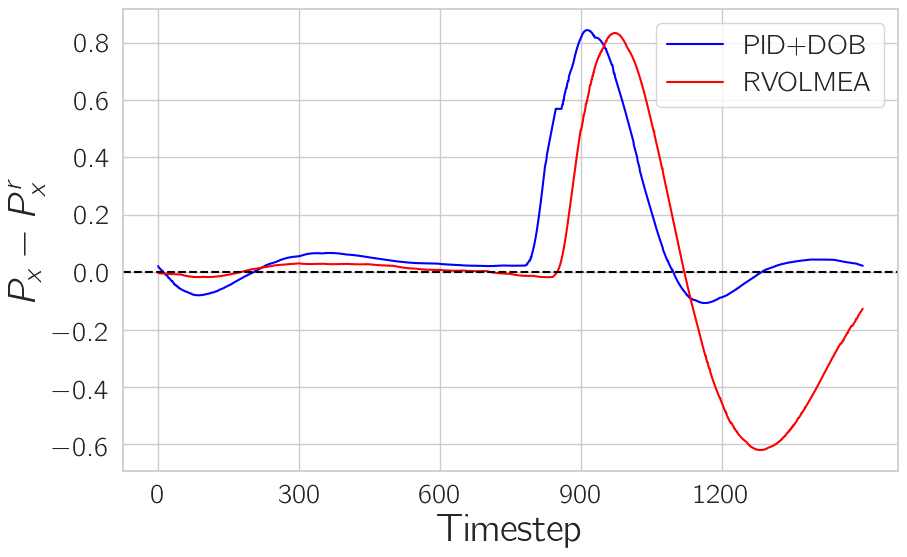

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=[i for i in range(0, len(df))],
             y=df.x - df.gx,
             label="PID+DOB",
             color="blue")
sns.lineplot(x=[i for i in range(0, len(df2))],
             y=df2.x - df2.gx,
             label="RVOLMEA",
             color="red")

plt.xlabel("Timestep", fontproperties=font_properties)
plt.ylabel("$P_x - P_x^r$", fontproperties=font_properties)

# Set x and y ticks font size and reduce x ticks
plt.xticks(ticks=range(0, len(df), 300), fontsize=20)
plt.yticks(fontsize=20)

# Draw line at 0 to make clear where error middle is
plt.axhline(0, color="black", linestyle="--")

# Update legend font size
leg = plt.legend(prop={'size': 20})

# Save as pdf
plt.savefig("pid_dob_rvolmea_wrench_x.pdf", bbox_inches="tight")

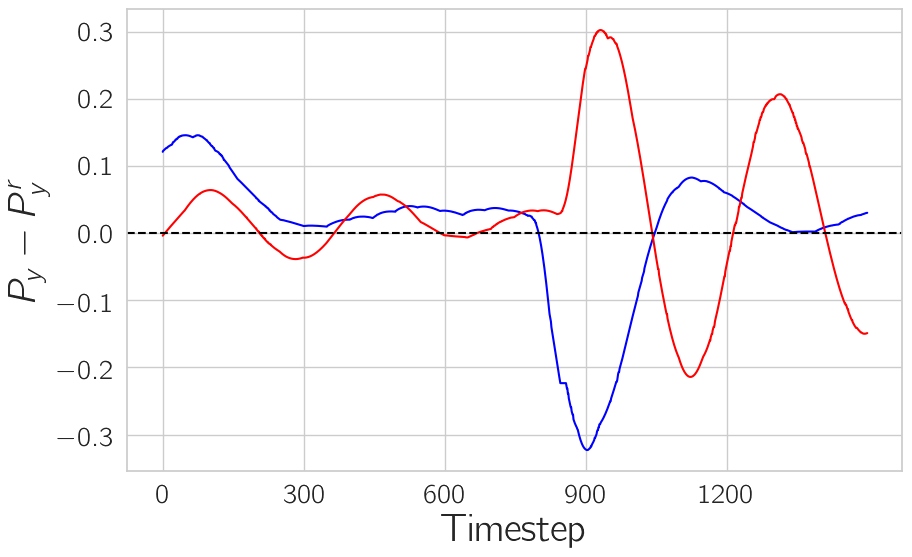

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=[i for i in range(0, len(df))],
             y=df.y - df.gy,
             color="blue")
sns.lineplot(x=[i for i in range(0, len(df2))],
                y=df2.y - df2.gy,
                color="red")

plt.xlabel("Timestep", fontproperties=font_properties)
plt.ylabel("$P_y - P_y^r$", fontproperties=font_properties)

# Set x and y ticks font size and reduce x ticks
plt.xticks(ticks=range(0, len(df), 300), fontsize=20)
plt.yticks(fontsize=20)

# Draw line at 0 to make clear where error middle is
plt.axhline(0, color="black", linestyle="--")

# Update legend font size

# Save as pdf
plt.savefig("pid_dob_rvolmea_wrench_y.pdf", bbox_inches="tight")

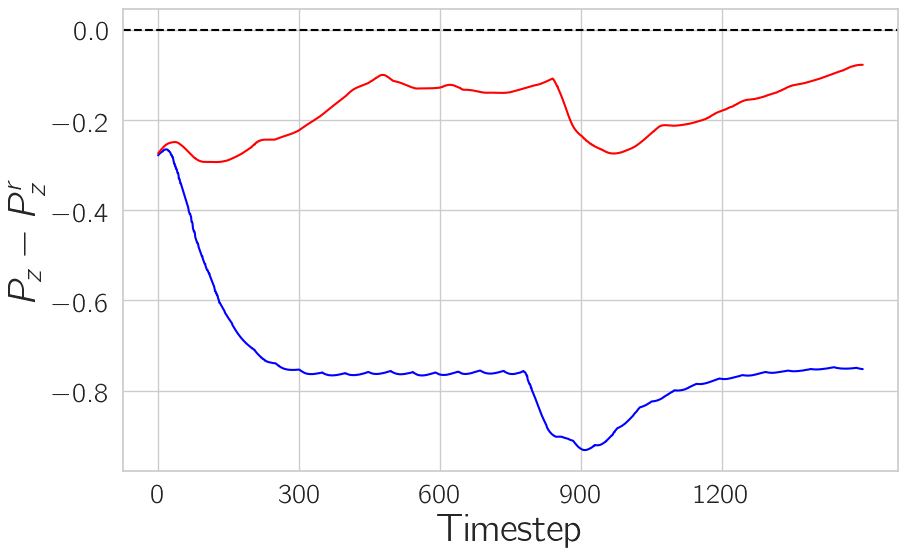

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=[i for i in range(0, len(df))],
             y=df.z - df.gz,
             color="blue")
sns.lineplot(x=[i for i in range(0, len(df2))],
                y=df2.z - df2.gz,
                color="red")

plt.xlabel("Timestep", fontproperties=font_properties)
plt.ylabel("$P_z - P_z^r$", fontproperties=font_properties)

# Set x and y ticks font size and reduce x ticks
plt.xticks(ticks=range(0, len(df), 300), fontsize=20)
plt.yticks(fontsize=20)

# Draw line at 0 to make clear where error middle is
plt.axhline(0, color="black", linestyle="--")

# Update legend font size

# Save as pdf
plt.savefig("pid_dob_rvolmea_wrench_z.pdf", bbox_inches="tight")

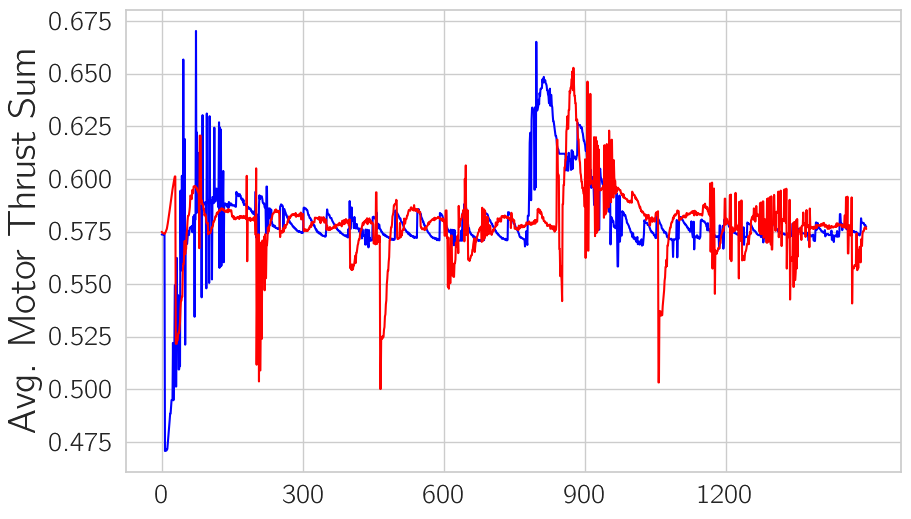

In [ ]:
df["control_sum"] = df.motor0 + df.motor1 + df.motor2 + df.motor3
df2["control_sum"] = df2.motor0 + df2.motor1 + df2.motor2 + df2.motor3
plt.figure(figsize=(10, 6))
sns.lineplot(x=[i for i in range(0, len(df))],
             y=df["control_sum"] / 4,
             color="blue")
sns.lineplot(x=[i for i in range(0, len(df2))],
                y=df2["control_sum"] / 4,
                color="red")
plt.ylabel("Avg. Motor Thrust Sum", fontproperties=font_properties)
# Set x and y ticks font size and reduce x ticks
plt.xticks(ticks=range(0, len(df), 300), fontsize=20)
plt.yticks(fontsize=20)
# Save as pdf

plt.savefig("pid_dob_rvolmea_wrench_motors.pdf", bbox_inches="tight")
# Show plots
plt.show()

<Axes: >

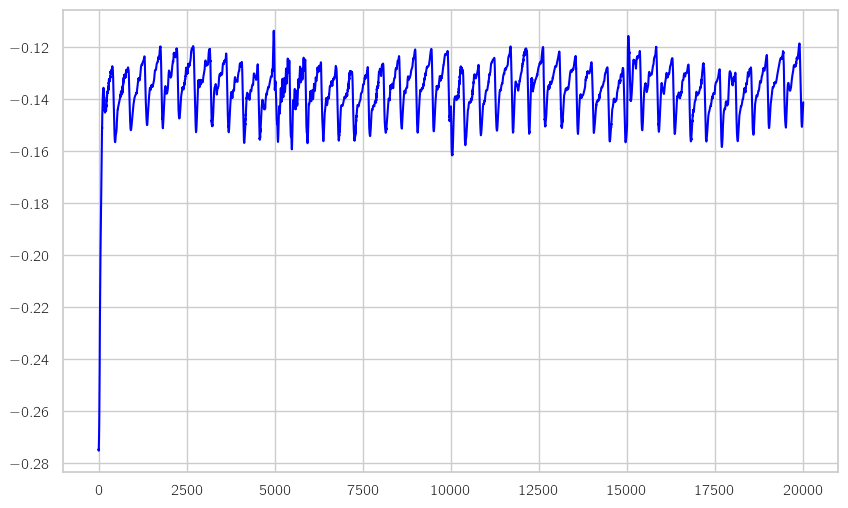

In [ ]:
df = pd.read_csv("./traj.csv")
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=[i for i in range(0, len(df))],
             y=df.z - df.gz,
             color="blue")